In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (5.0, 4.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

np.random.seed(1)


In [2]:
def zero_pad(X, pad):
    X_pad = np.pad(X, ((0,0), (pad, pad), (pad, pad), (0,0)), 'constant', constant_values = 0)
    return X_pad
    



x.shape =  (4, 3, 3, 2)
X_pad.shape =  (4, 7, 7, 2)
x[1,1] = [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
z_pad[1,1] [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


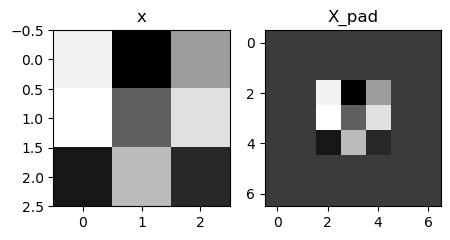

In [3]:
np.random.seed(1)
x = np.random.randn(4, 3, 3, 2)
X_pad = zero_pad(x, 2 )

print("x.shape = ", x.shape)
print("X_pad.shape = ", X_pad.shape)
print("x[1,1] =", X_pad[1,1])
print("z_pad[1,1]", X_pad[1,1])

fig, axarr = plt.subplots(1,2)
axarr[0].set_title('x')
axarr[0].imshow(x[0,:,:,0])
axarr[1].set_title('X_pad')
axarr[1].imshow(X_pad[0,:,:,0])

In [4]:
def conv_single_step(a_slice_prev, w,b):
    s = np.multiply(a_slice_prev, w)
    z = np.sum(s)
    z = float(b)+z
    return z
np.random.seed(1)
a_slice_prev = np.random.randn(4, 4, 3)
w = np.random.randn(4, 4, 3)
b = np.random.randn(1, 1, 1)
z = conv_single_step(a_slice_prev, w, b)
print("z = ", z)

z =  -6.999089450680221


In [5]:

def conv_forward(A_prev, W, b, hparameters):
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    (f, f, n_C_prev, n_C) = W.shape
    stride = hparameters['stride']
    pad = hparameters['pad']

    n_H = int(((n_H_prev - f + 2 * pad) / stride) + 1)
    n_W = int(((n_W_prev - f + 2 * pad) / stride) + 1)
    Z = np.zeros((m, n_H, n_W, n_C))

    A_prev_pad = zero_pad(A_prev, pad)
    for i in range(m):
        a_prev_pad = A_prev_pad[i]
        for h in range(n_H):
            for w in range(n_W):
                for c in range(n_C):
                    vert_start = h * stride
                    vert_end = vert_start + f
                    horiz_start = w * stride
                    horiz_end = horiz_start + f
                    a_slice_prev = a_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :]
                    Z[i, h, w, c] = conv_single_step(a_slice_prev, W[..., c], b[..., c])

    assert(Z.shape == (m, n_H, n_W, n_C))
    cache = (A_prev, W, b, hparameters)
    
    return Z, cache


In [6]:
np.random.seed(1)
A_prev =np.random.randn(10, 4, 4, 3)
W = np.random.randn(2, 2, 3, 8)
b = np.random.randn (1, 1, 1, 8)

hparameters = {"pad" :2,
              "stride" : 2}

Z,cache_conv = conv_forward(A_prev, W, b, hparameters)

print("Z'nin ortalama =", np.mean(Z))
print("Z[3, 2, 1] = ", Z[3, 2, 1])
print("cache_conv[0][1][2][3] =", cache_conv[0][1][2][3])

Z'nin ortalama = 0.048995203528855794
Z[3, 2, 1] =  [-0.61490741 -6.7439236  -2.55153897  1.75698377  3.56208902  0.53036437
  5.18531798  8.75898442]
cache_conv[0][1][2][3] = [-0.20075807  0.18656139  0.41005165]


In [43]:
def pool_forward(A_prev, hparameters, mode = "max"):
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    
    f = hparameters["f"]
    stride = hparameters["stride"]
    
    n_H = int(1 + (n_H_prev -f)/stride)
    n_W = int(1 + (n_W_prev -f)/stride)
    n_C = n_C_prev
    
    A = np.zeros((m, n_H, n_W, n_C))
    
    for i in range(m):
        for h in range(n_H):
            for w in range(n_W):
                for c in range(n_C):
                    vert_start = h * stride
                    vert_end = vert_start + f
                    horiz_start = w * stride
                    horiz_end = horiz_start + f
                    
                    a_prev_slice = A_prev[i, vert_start:vert_end, horiz_start:horiz_end, c]
                    
                    if mode == "max" : 
                        A[i, h, w, c] = np.max(a_prev_slice)
                    elif mode == "average" :
                        A[i, h, w, c] = np.mean(a_prev_slice)
    cache=(A_prev, hparameters)
    assert(A.shape == (m, n_H, n_W, n_C))
    
    return A, cache 


            

In [44]:
np.random.seed(1)

A_prev = np.random.randn(2, 4, 4, 3)
hparameters = {"stride" : 2, "f" : 3}

A, cache = pool_forward(A_prev, hparameters)

print("mod = max")
print("A=", A)

A, cache = pool_forward(A_prev, hparameters, mode = " average")
print("mod = average")
print("A =", A)

mod = max
A= [[[[1.74481176 0.86540763 1.13376944]]]


 [[[1.13162939 1.51981682 2.18557541]]]]
mod = average
A = [[[[0. 0. 0.]]]


 [[[0. 0. 0.]]]]


In [45]:
def conv_backward(dZ, cache):
    (A_prev, W, b, hparameters) = cache
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    (f, f, n_C_prev, n_C) = W.shape
    stride = hparameters['stride']
    pad = hparameters['pad']
    
    (m, n_H, n_W, n_C) = dZ.shape
    
    dA_prev = np.zeros((m, n_H_prev, n_W_prev, n_C_prev))
    dW = np.zeros((f, f, n_C_prev, n_C))
    db = np.zeros((1, 1, 1, n_C))
    
    A_prev_pad = zero_pad(A_prev, pad)
    dA_prev_pad = zero_pad(dA_prev, pad)
    
    for i in range(m):
        a_prev_pad = A_prev_pad[i]
        da_prev_pad = dA_prev_pad[i]
        
        for h in range(n_H):
            for w in range(n_W):
                for c in range(n_C):
                    
                    vert_start = h * stride 
                    vert_end = vert_start + f
                    horiz_start = w * stride 
                    horiz_end = horiz_start + f
                    
                    a_slice = a_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :]
                    
                    da_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :] += W[:, :, :, c] * dZ[i, h, w, c]
                    dW[:, :, :, c] += a_slice * dZ[i, h, w, c]
                    db[:, :, :, c] += dZ[i, h, w, c]
                    
        dA_prev[i, :, :, :] = da_prev_pad[pad:-pad, pad:-pad, :]
        
    assert(dA_prev.shape == (m, n_H_prev, n_W_prev, n_C_prev))
    
    return dA_prev, dW, db

In [46]:
np.random.seed(1)
dA, dW, db = conv_backward(Z, cache_conv)

print("dA ortalama =", np.mean(dA))
print("dW ortalama =", np.mean(dW))
print("db ortalama =", np.mean(db))

dA ortalama = 1.4524377775388075
dW ortalama = 1.7269914583139097
db ortalama = 7.839232564616838


In [47]:
def create_mask_from_window(x):
    mask = x ==np.max(x)
    return mask

In [48]:
np.random.seed(1)
x = np.random.randn(2,3)
mask = create_mask_from_window(x)

print('x =', x)
print('maske', mask)

x = [[ 1.62434536 -0.61175641 -0.52817175]
 [-1.07296862  0.86540763 -2.3015387 ]]
maske [[ True False False]
 [False False False]]


In [49]:
def distribute_value(dZ, shape):
    (n_H, n_W) = shape
    average = dZ / (n_H * n_W)
    a = np.ones(shape) * average
    return a

In [50]:
a = distribute_value (2,(2,2))
print('dagıltılmıs deger', a)

dagıltılmıs deger [[0.5 0.5]
 [0.5 0.5]]


In [51]:
def pool_backward(dA, cache,mode= "max"):
    (A_prev, hparameters) = cache
    stride= hparameters['stride']
    f = hparameters['f']
    m, n_H_prev, n_W_prev, n_C_prev = A_prev.shape
    m, n_H, n_W, n_C = dA.shape
    dA_prev = np.zeros(A_prev.shape)
    
    for i in range(m):
        a_prev = A_prev[i]
        for h in range(n_H):
            for w in range(n_W):
                for c in range(n_C):
                    vert_start = h
                    vert_end = vert_start + f
                    horiz_start = w
                    horiz_end = horiz_start + f 
                    
                    if mode == "max":
                        a_prev_slice = a_prev[vert_start:vert_end, horiz_start:horiz_end, c]
            
                        mask = create_mask_from_window(a_prev_slice)
                   
                        dA_prev[i, vert_start: vert_end, horiz_start: horiz_end, c] += np.multiply(mask, dA[i, h, w, c])
                    elif mode == "average":
                        da = dA[i, h, w, c]
                        shape= (f,f)
                        dA_prev[i, vert_start:vert_end, horiz_start:horiz_end, c ] += distribute_value(da,shape) 
        
        assert(dA_prev.shape == A_prev.shape)
        return dA_prev
                            
                    

In [52]:
np.random.seed(1)

A_prev = np.random.randn(5, 5, 3, 2)
hparameters = {"stride": 1, "f":2}
A, cache = pool_forward(A_prev, hparameters)
dA = np.random.randn(5, 4, 2, 2)

dA_prev = pool_backward(dA, cache, mode= "max")

print("mod = max")
print('dA ortalaması =', np.max(dA))
print('dA_prev[1,1]', dA_prev[1,1])
print()

dA_prev = pool_backward(dA, cache, mode= "average")

print("mod = average")
print('dA ortalaması =', np.mean(dA))
print('dA_prev[1,1]', dA_prev[1,1])

mod = max
dA ortalaması = 2.528325706806398
dA_prev[1,1] [[0. 0.]
 [0. 0.]
 [0. 0.]]

mod = average
dA ortalaması = 0.14571390272918056
dA_prev[1,1] [[0. 0.]
 [0. 0.]
 [0. 0.]]
